## Fit K-Nearest-Neighbors Model and Random Forest Model in Jupyter Notebook.

Import relevant packages and read final dataset.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn import ensemble

In [18]:
final_data = pd.read_csv("Desktop/STAT 4911/Advancement Office Project/final_data.csv")

Split the Data into training set and testing set.

In [6]:
x = final_data.iloc[:, [1,2,3,4,5,6,7,8,9]]
y = final_data.iloc[:, [0]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=491)

***


## K-Nearest-Neighbors Model

Since we think that the graduates with the similar features and characters may make the similar decisions on engagement, so we try to fit the KNN model to find these similar graduates.

But firstly, we have to decides what's the best distance of neighbors in the model, which is the value of K. We decides to fits 50 K to check which one is the best. Due to the extremely large original data, we decide to randomly select a sample from original data to fit different K, and try to find the best one which has the highest F1-Score.

In [3]:
subset = final_data.sample(n=1000, random_state=491)

x2 = subset.iloc[:, [1,2,3,4,5,6,7,8,9]]
y2 = subset.iloc[:, [0]]
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.33, random_state=491)

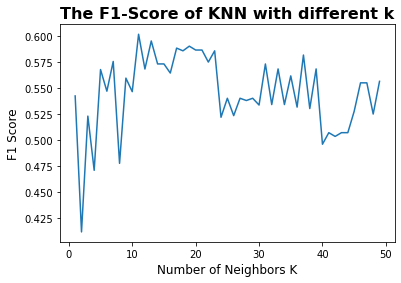

In [4]:
k_list = list(range(1,50,1))
f1 = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train2, y_train2.squeeze())
    y_pred = knn.predict(x_test2)
    f1.append(f1_score(y_test2, y_pred, pos_label=True))
    
plt.title('The F1-Score of KNN with different k', fontsize=16, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.plot(k_list, f1)
plt.show()

After fitting K value from 1 to 50, we found that the K value around 20 have the relatively higher F1-Score and relatively consistent. So we choose 20 as K value to fit the KNN models.

In [7]:
knn_clf = KNeighborsClassifier(n_neighbors=20)
knn_clf.fit(x_train, y_train.squeeze())
knn_y_pred = knn_clf.predict(x_test)

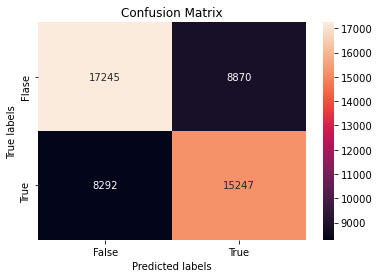

In [12]:
knn_cm = confusion_matrix(y_test, knn_y_pred)

ax= plt.subplot()
sns.heatmap(knn_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['Flase', 'True']);

In [11]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

       False       0.68      0.66      0.67     26115
        True       0.63      0.65      0.64     23539

    accuracy                           0.65     49654
   macro avg       0.65      0.65      0.65     49654
weighted avg       0.65      0.65      0.65     49654



We can see from the summary report of the KNN model that the model accuracy is 0.65. The F1-Score which treats True engagement as positive label is 0.64, and F1-Score which treats False engagement as positive label is 0.67. We can also see this situation in confusion matrix. The True Negative is 17245, which is higher than True Positive 15247. It seems that our KNN model is better in predicting graduates who are not willing to engage. We will talk more about it later.


***

## Random Forest Model

Then we want to try another model, random forest. We use the same method as we did in KNN: try different n-estimator(which is the number of trees in the forests) using the random sample from original data and find the best one which can make the highest F1-Score. We tried n-estimator from 100 to 1000.

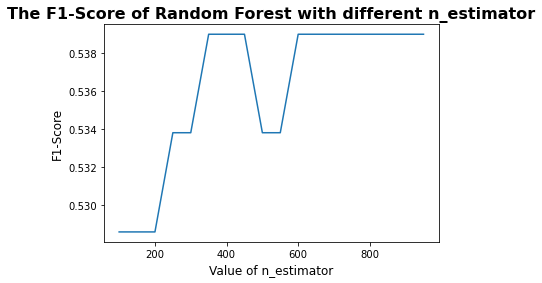

In [14]:
n_list = list(range(100,1000,50))
f1 = []

for n in n_list:
    rf = ensemble.RandomForestClassifier(n_estimators = n, oob_score = True, random_state = 491)
    rf.fit(x_train2, y_train2.squeeze())
    y_pred = rf.predict(x_test2)
    f1.append(f1_score(y_test2, y_pred, pos_label=True))
    
plt.title('The F1-Score of Random Forest with different n_estimator', fontsize=16, fontweight='bold')
plt.xlabel('Value of n_estimator', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.plot(n_list, f1)
plt.show()

After fitting the model with different n-estimators, we decide to use 400 n-estimator because it's the smallest n-estimator which get the highest F1-Score. Then we fit the random forest model with original data.

In [15]:
rf = ensemble.RandomForestClassifier(n_estimators = 400, oob_score = True, random_state = 491)
rf.fit(x_train, y_train.squeeze())
rf_y_pred = rf.predict(x_test)

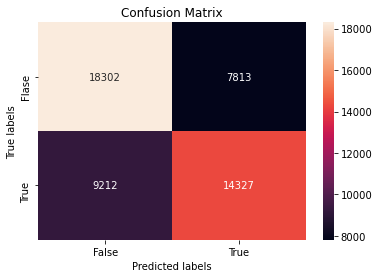

In [16]:
rf_cm = confusion_matrix(y_test, rf_y_pred)

ax= plt.subplot()
sns.heatmap(rf_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['Flase', 'True']);

In [17]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

       False       0.67      0.70      0.68     26115
        True       0.65      0.61      0.63     23539

    accuracy                           0.66     49654
   macro avg       0.66      0.65      0.65     49654
weighted avg       0.66      0.66      0.66     49654



From the summary report, we can see that the model accuracy is 0.66, which is little better than KNN model. Also the F1-Score which treats True engagement as positive label is 0.63, and F1-Score which treats False engagement as positive label is 0.68. This also reflect in the confusion matrix, which means random forest is even worth than KNN in predicting graduates who is willing to engage. Why's this situation happened in both models? I will explain our thoughts in the summary.


***

## Summary

As we talked above, nearly all of our models is better in predicting graduates who is not willing to engage. This obviously does not meet the university's expectations. However, we have only one model that is better in predicting graduates who willing to engage, which is Combined Logistic Model. This model predicts three different types of engagement seperately, because predictors are correlated differently with different types of engagement. Therefore, we think this is one of the best way to predict graduates who is willing to engage. 


***